In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, zero_one_loss
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
input_csv = 'mytrain.csv'

df = pd.read_csv(input_csv)
df.head()

,ID,red,green,blue,Y,cblue,cred,class
0,1,226,227,234,229,125,132,1
1,2,192,135,137,140,134,115,1
2,3,206,197,179,198,133,121,1
3,4,200,186,139,186,135,111,1
4,5,139,136,111,139,131,121,2


In [4]:
X = df[['red', 'green', 'blue', 'Y', 'cblue', 'cred']]

y = df['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
print(y_pred)

[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1 1 1 2 1 1
 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [9]:
print(zero_one_loss(y_test, y_pred))

0.20394736842105265


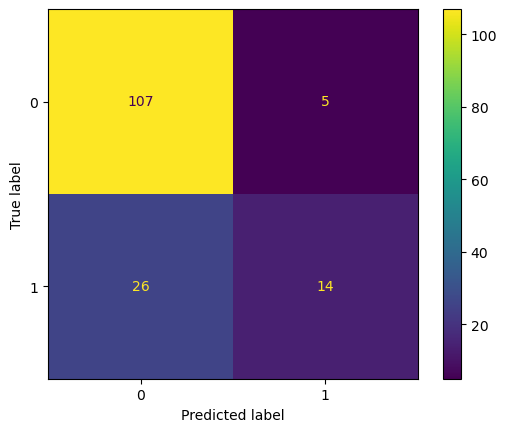

In [10]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7960526315789473
Precision: 0.8045112781954887
Recall: 0.9553571428571429


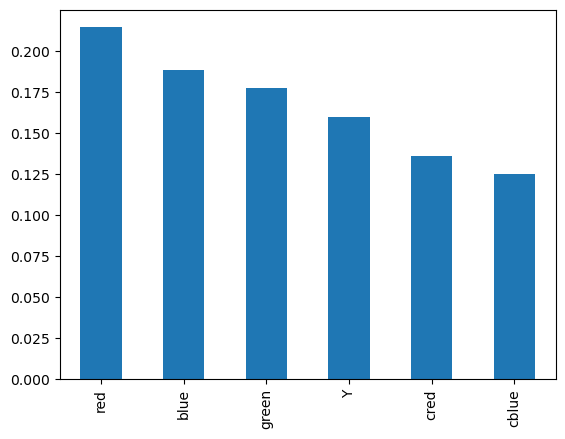

In [12]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [15]:
jaundiced = pd.DataFrame({'red':[139], 'green':[136], 'blue':[111], 'Y':[139],  'cblue':[131],  'cred':[121]})
print(rf.predict(jaundiced))

[2]


In [16]:
import joblib

joblib.dump(rf, 'jaundice-detector.joblib')

['jaundice-detector.joblib']